In [55]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import sklearn as sk
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [56]:
#reading csv file
df=pd.read_csv("1632300362534233.csv")

In [57]:
#removing rows without address
df['Address'].replace('', np.nan, inplace=True)
df.dropna(subset=['Address'], inplace=True)

In [58]:
#removing rows which its area is outlier (95% confidence interval)
df['Area']= pd.to_numeric(df['Area'], errors='coerce')
z_scores = stats.zscore(df['Area'].dropna())
df['Z_Score'] = 0
df.loc[df['Area'].notnull(), 'Z_Score'] = z_scores
threshold = 2
df = df[df['Z_Score'] <= threshold]
df = df[df['Area']<= 500]

In [59]:
#Converting categorical features into numerical format
label_encoder = LabelEncoder()
df['Address'] = label_encoder.fit_transform(df['Address'])
df['Parking'] = label_encoder.fit_transform(df['Parking'])
df['Warehouse'] = label_encoder.fit_transform(df['Warehouse'])
df['Elevator'] = label_encoder.fit_transform(df['Elevator'])
#defining price per year as a new column  
df['price_per_area'] = df['Price'] / df['Area']
df = df.rename(columns={'Price(USD)': 'Price_Dollar'})


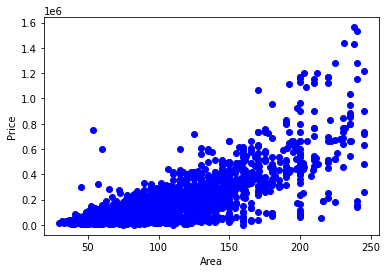

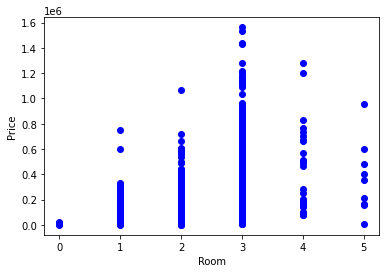

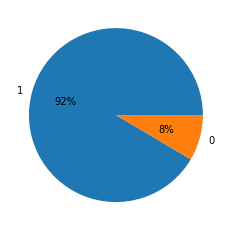

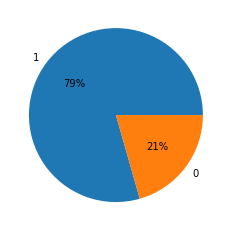

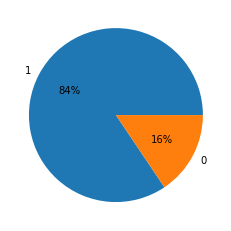

C:\Users\hajis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


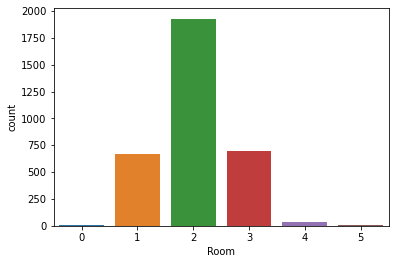

In [60]:
#Visulaizing data

#correlation of area and price
plt.scatter(df.Area, df.Price_Dollar,  color='blue')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

#correlation of room and price
plt.scatter(df.Room, df.Price_Dollar,  color='blue')
plt.xlabel("Room")
plt.ylabel("Price")
plt.show()



#pie chart of warehouse
data = df['Warehouse'].value_counts()
plt.pie(data, labels=data.index, autopct='%.0f%%')
plt.show()

#pie chart of having elevator
data = df['Elevator'].value_counts()
plt.pie(data, labels=data.index, autopct='%.0f%%')
plt.show()

#pie chart of having parking
data = df['Parking'].value_counts()
plt.pie(data, labels=data.index, autopct='%.0f%%')
plt.show()

#distribution of number of rooms
sns.countplot(df['Room'])  
plt.show()

In [61]:
#test and train split
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]



In [62]:
# multiple linear regression model training using Address as variable


from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Area','Parking', 'Room', 'Address', 'Warehouse', 'Elevator']])
y = np.asanyarray(train[['Price_Dollar']])
regr.fit (x, y)
y_hat= regr.predict(test[['Area','Parking', 'Room', 'Address', 'Warehouse', 'Elevator']])
x = np.asanyarray(test[['Area','Parking', 'Room', 'Address', 'Warehouse', 'Elevator']])
y = np.asanyarray(test[['Price_Dollar']])

#results
print ('Coefficients: ', regr.coef_)

print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[ 3.79196767e+03  1.34175448e+04 -4.58910192e+04 -2.46626833e+01
   1.89061728e+04  7.42887326e+03]]
Residual sum of squares: 11957491438.99
Variance score: 0.61


C:\Users\hajis\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [63]:
# multiple linear regression model training using 'price per area' in replace of address as a variable



from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Area','Parking', 'Room', 'price_per_area', 'Warehouse', 'Elevator']])
y = np.asanyarray(train[['Price_Dollar']])
regr.fit (x, y)
y_hat= regr.predict(test[['Area','Parking', 'Room', 'price_per_area', 'Warehouse', 'Elevator']])
x = np.asanyarray(test[['Area','Parking', 'Room', 'price_per_area', 'Warehouse', 'Elevator']])
y = np.asanyarray(test[['Price_Dollar']])


#results
print ('Coefficients: ', regr.coef_)

print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[ 2.09224541e+03 -2.53049710e+04 -1.76735722e+04  3.99523719e-03
  -8.84712726e+02 -1.35420147e+04]]
Residual sum of squares: 2425883306.17
Variance score: 0.92


C:\Users\hajis\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Now we want to reduce the features by analyzing the histograms and correlations:

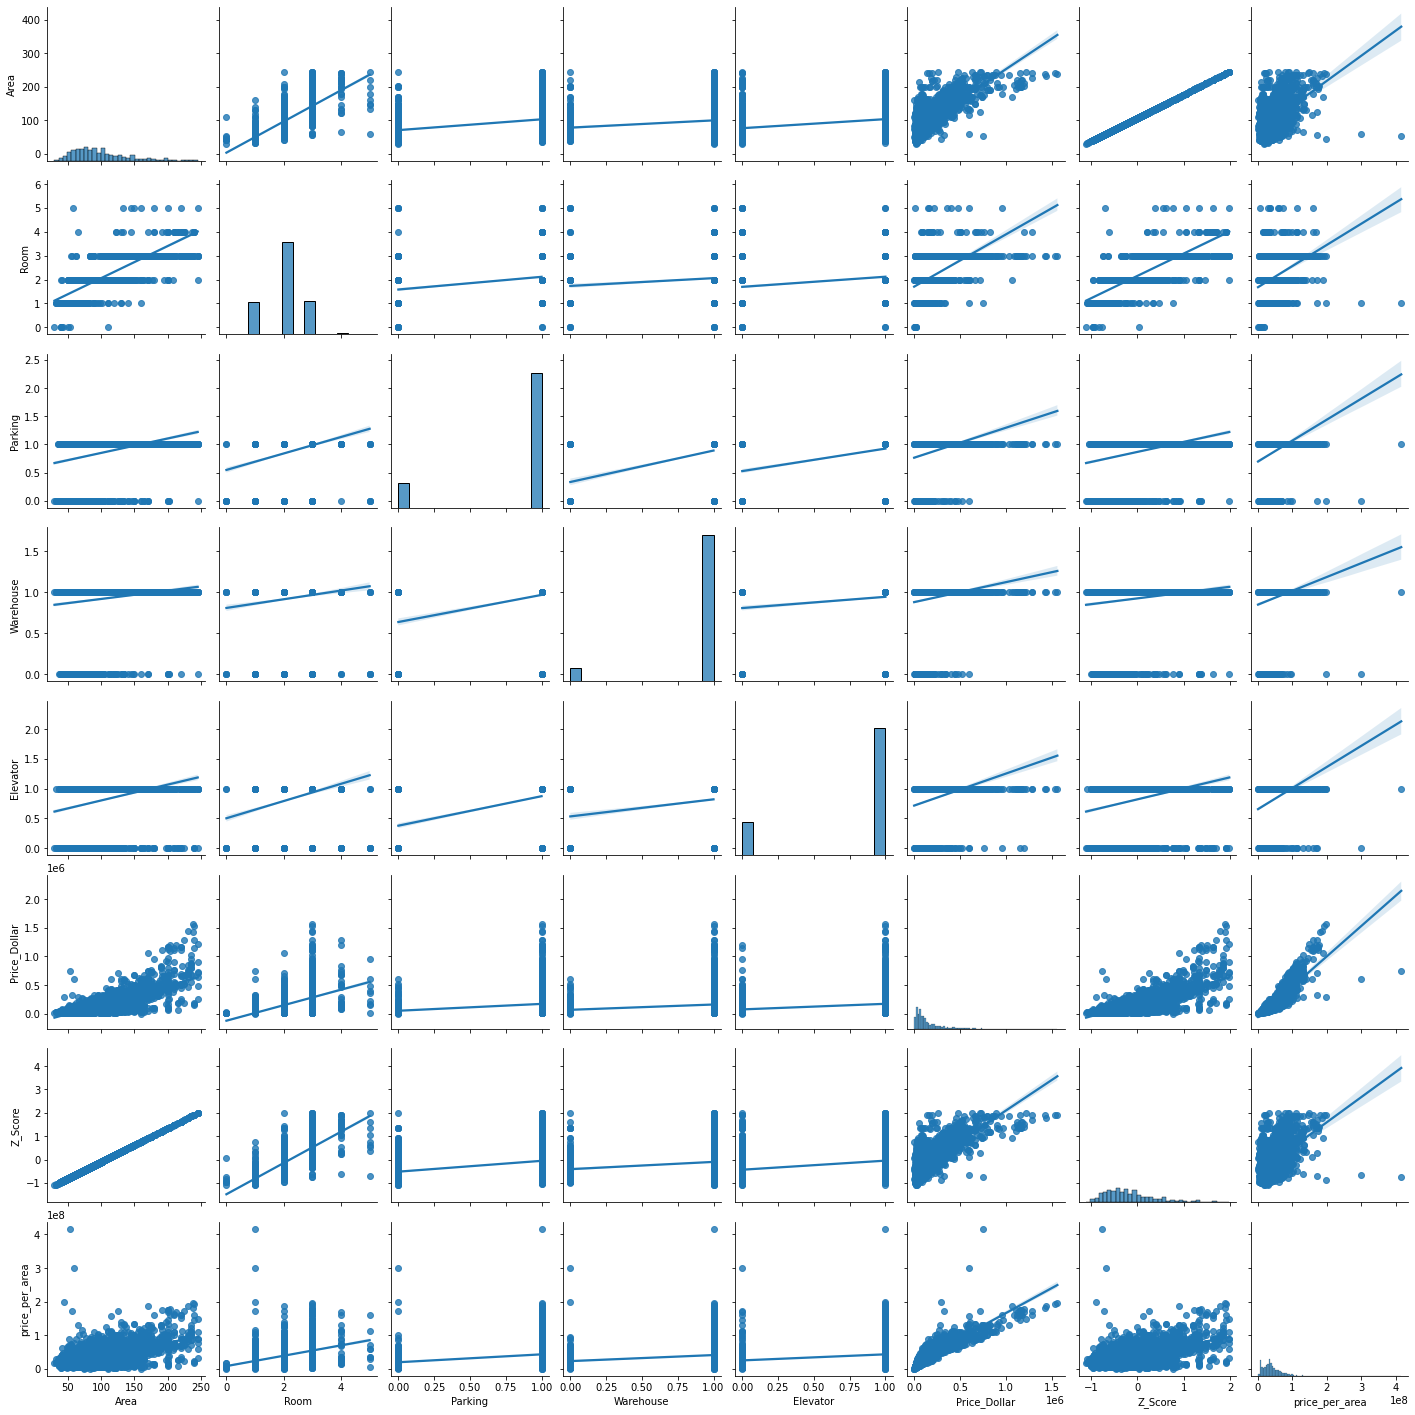

In [40]:
df_LE = df.drop(['Price','Address'], axis = 1)
sns.pairplot(df_LE, kind='reg')
# to show
plt.show()

<AxesSubplot:>

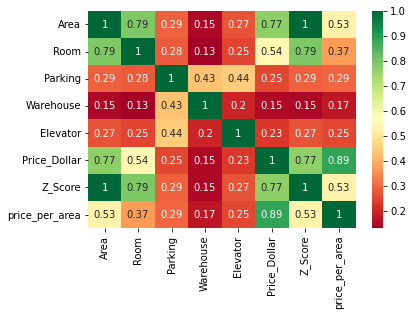

In [41]:
df_LE.corr()
sns.heatmap(df_LE.corr(), annot=True,cmap='RdYlGn')

As it is obvious in the table above, Area and Room have a fair correlation with Price _Dollar. We choose Area because it has a higher correlation. We remove Parking, Warehouse, Elevator due to their poor correlation.

In [64]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Area']])
train_y = np.asanyarray(train[['Price_Dollar']])
regr.fit (train_x, train_y)



#results
print ('Coefficients: ', regr.coef_)




Coefficients:  [[3247.18531061]]


Mean absolute error: 70174.01
Residual sum of squares (MSE): 12241378409.19
R2-score: 0.60


C:\Users\hajis\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


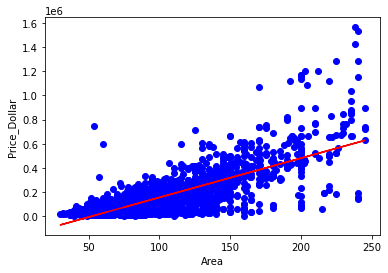

In [65]:
from sklearn.metrics import r2_score
plt.scatter(train.Area, train.Price_Dollar,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Area")
plt.ylabel("Price_Dollar")

y_hat= regr.predict(test[['Area']])
test_x = np.asanyarray(test[['Area']])
test_y = np.asanyarray(test[['Price_Dollar']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

